Problem statement:


*              Oil prices are a major determinant of the global economy. They have a
significant impact on the cost of transportation, energy and other goods and services. Changes in oil price can have a ripple effect throughout the economy affecting business, consumers and governments.
The ability to predict oil prices would be a valuable asset for business, inventors, and governments. It would allow them to make informed decisions about how to manage their risk and take advantage of potential opportunities.






In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
#import data
from google.colab import files
uploaded=files.upload()

Saving Oil price history.xlsx to Oil price history.xlsx


In [ ]:
 #read the data
data=pd.read_excel("Oil price history.xlsx")

In [ ]:
#Display first 5 rows of the data
data.head(30)

,Date,Price
0,"Jan 31, 2020",51.56
1,"Jan 30, 2020",52.14
2,"Jan 29, 2020",53.33
3,"Jan 28, 2020",53.48
4,"Jan 27, 2020",53.14
5,"Jan 24, 2020",54.19
6,"Jan 23, 2020",55.59
7,"Jan 22, 2020",56.74
8,"Jan 21, 2020",58.34
9,"Jan 20, 2020",58.73


In [ ]:
data.info()        #Date is in object datatype


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5000 non-null   object 
 1   Price   5000 non-null   float64
dtypes: float64(1), object(1)
memory usage: 78.2+ KB


In [ ]:
data['Date']=pd.to_datetime(data['Date'])     #Converting date column to datetime datatype

In [ ]:
data.info()         #Datatype of Date is changed to datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5000 non-null   datetime64[ns]
 1   Price   5000 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 78.2 KB


In [ ]:
data.isnull().sum()       #No null values

Date     0
Price    0
dtype: int64

In [ ]:
data.duplicated().sum()          #No duplicate values

0

In [ ]:
date=data.Date.tolist()  #Taking the Date column from data and converting into list

Let us check if the dates are continuos or not

In [ ]:
from datetime import datetime, timedelta

# using loop for iterating all elements
res = True
for idx in range(1, len(date)):

    # checking for 1 day time difference
    if (date[idx - 1] - date[idx]).days != 1:
        res = False
        break

# printing result
print("Are dates consecutive : " + str(res))

Are dates consecutive : False


Dates are not cnontinuous, we need to fill the missing dates

In [ ]:
data["Date"] = pd.to_datetime(data.Date,format="%b-%y")  #changing the date format to YYYY-MM-DD


In [ ]:
import datetime

In [ ]:
len_of_date=len(data.Date)     #length of the date

In [ ]:
start=data.Date[0]
end=data.Date[len_of_date-1]

new_dates = pd.date_range(start=end,end=start,freq='D')

In [ ]:
start    #start date in our data

Timestamp('2020-01-31 00:00:00')

In [ ]:
end        #end date in our data

Timestamp('2000-06-25 00:00:00')

In [ ]:
new_dates     #new dates

DatetimeIndex(['2000-06-25', '2000-06-26', '2000-06-27', '2000-06-28',
               '2000-06-29', '2000-06-30', '2000-07-01', '2000-07-02',
               '2000-07-03', '2000-07-04',
               ...
               '2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31'],
              dtype='datetime64[ns]', length=7160, freq='D')

In [ ]:
#we have 5000 rows in our data and if we generate new dates we got 7160
#i.e., 2160 dates are missing in our data.

In [ ]:
data = data.set_index('Date')    #we are setting Date acolumn as our index

In [ ]:
data.head()

,Price
Date,
2020-01-31,51.56
2020-01-30,52.14
2020-01-29,53.33
2020-01-28,53.48
2020-01-27,53.14


In [ ]:
data = data.reindex(new_dates)     #we have index as Date but we will re-index it with our new dates which we generated.

data = data.rename_axis('date')      #we are renaming it as date.

print(data)

            Price
date             
2000-06-25  31.60
2000-06-26  31.63
2000-06-27  32.06
2000-06-28  31.90
2000-06-29  32.72
...           ...
2020-01-27  53.14
2020-01-28  53.48
2020-01-29  53.33
2020-01-30  52.14
2020-01-31  51.56

[7160 rows x 1 columns]


In [ ]:
data.isnull().sum()     #Now if we check, 2160 null values are present.

Price    2160
dtype: int64



 To impute missing values in a time series dataset we are using:

*    Last Observation Carried Forward (LOCF)









In [ ]:
data['Price']=data['Price'].fillna(method ='bfill')

In [ ]:
data.isnull().sum()        #Now if we check the null values again, it is zero.

Price    0
dtype: int64

Now we can see there are no Null values and all the dates are in continuous.

In [ ]:
data.describe()

,Price
count,7160.000000
mean,62.630297
std,25.966612
min,17.450000
25%,43.027500
50%,59.335000
75%,83.270000
max,145.290000


In [ ]:
data.shape
#7160 rows and 1 column is present.

(7160, 1)

#VIZUALIZATION

LINE PLOT

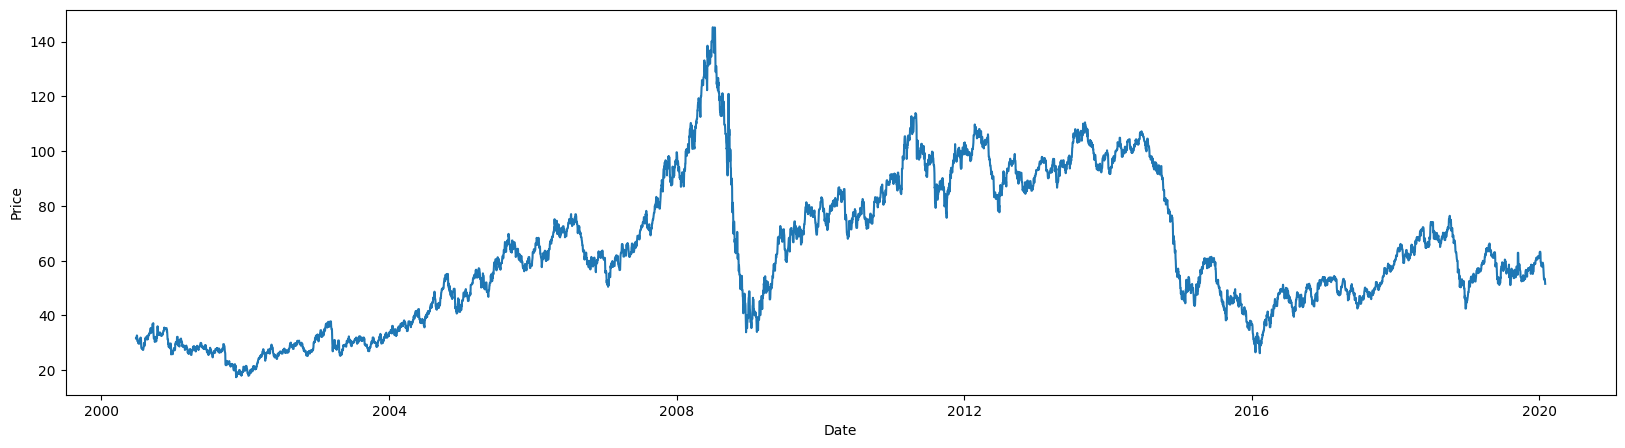

In [ ]:
#LINE PLOT
plt.figure(figsize=(20,5))
plt.xlabel("Date")
plt.ylabel("Price")
plt.plot(data.Price)



Observations:

*   By looking at the line plot we can tell that there is no Seasonality

*   No Trend

*   The highest price is 145

*   The lowest price is 17
*   We can observe that the price seems to be increasing from 2004 - 2008 time period and there is sudden drop.

*   And from 2009 again the price of the oil seems to increase and in 2015 again the price dropped.







#OUTLIER DETECTION

BOXPLOT

<Axes: >

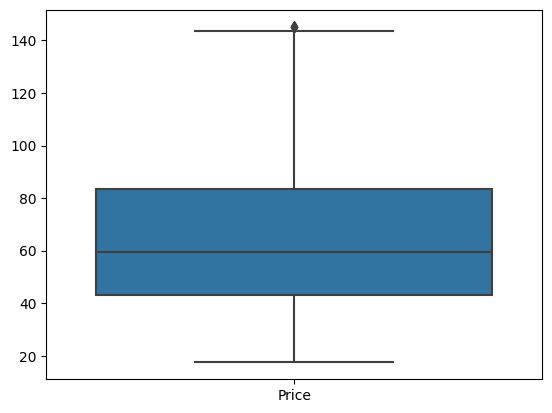

In [ ]:
#Box plot
sns.boxplot(data)



*   Outliers are present.
*   It is positively skewed or Right skewed.








In [ ]:
#Extracting Year and Month from the index

data['Year'] = pd.DatetimeIndex(data.index).year
data['Month'] = pd.DatetimeIndex(data.index).month

In [ ]:
data.head()

,Price,Year,Month
date,,,
2000-06-25,31.60,2000,6
2000-06-26,31.63,2000,6
2000-06-27,32.06,2000,6
2000-06-28,31.90,2000,6
2000-06-29,32.72,2000,6


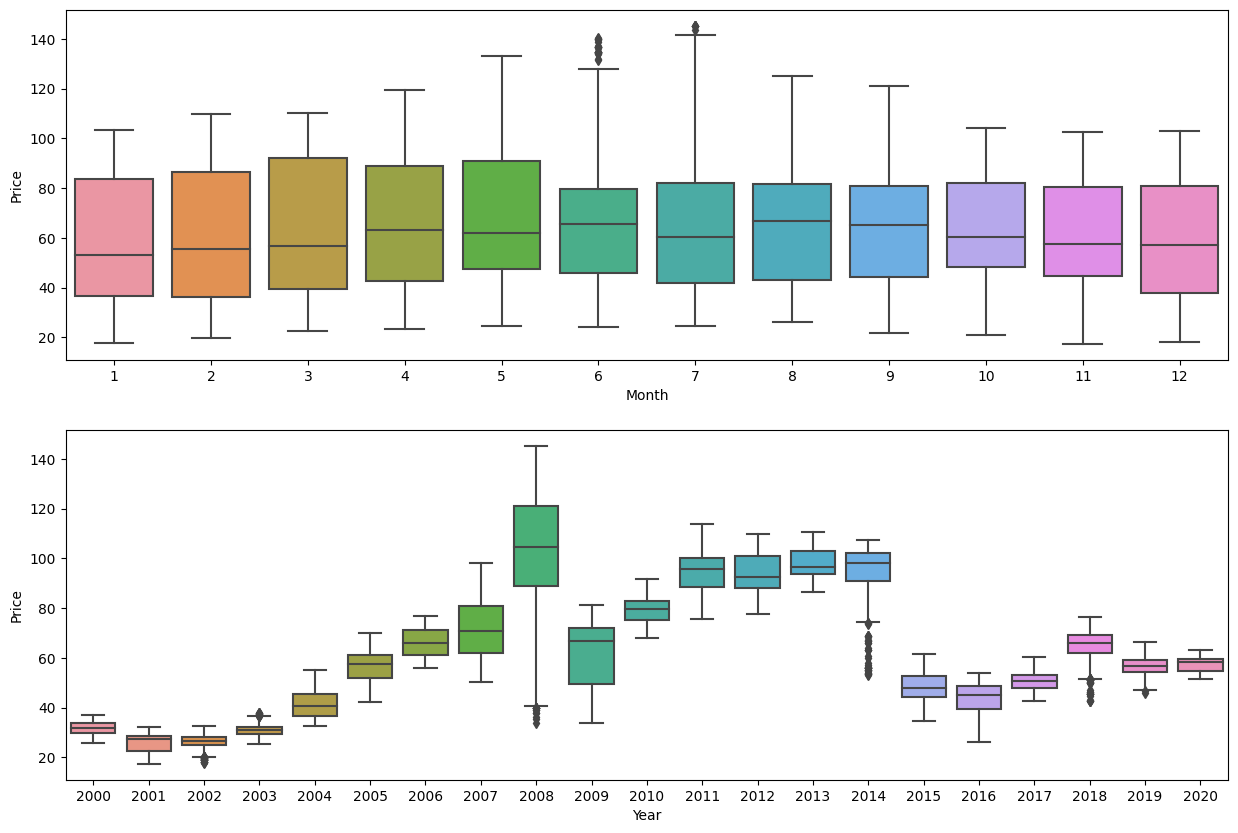

In [ ]:
# Boxplot for month and year vs Price
plt.figure(figsize=(15,10))
plt.subplot(211)
sns.boxplot(x="Month",y="Price",data=data)
plt.subplot(212)
year_outlier=sns.boxplot(x="Year",y="Price",data=data)


Observations:


*   If we observe the first plot, June and July month has Outliers.
*   2002, 2003, 2008, 2014, 2018, 2019 years has Outliers.
*   In 2008, the the minimumvalue of the oil price is nearly 30 and maximum oil price is nearly 140
*   The change in the oil price is very less in year 2000, 2003, 2020
*   The data is skewed if we observer boxplot of every year.












Printing the Outliers

whiskers [<matplotlib.lines.Line2D object at 0x7ffa62caab60>, <matplotlib.lines.Line2D object at 0x7ffa62caae00>]
caps [<matplotlib.lines.Line2D object at 0x7ffa62cab0a0>, <matplotlib.lines.Line2D object at 0x7ffa62cab340>]
boxes [<matplotlib.lines.Line2D object at 0x7ffa62caa8c0>]
medians [<matplotlib.lines.Line2D object at 0x7ffa62cab5e0>]
fliers [<matplotlib.lines.Line2D object at 0x7ffa62cab880>]
means []


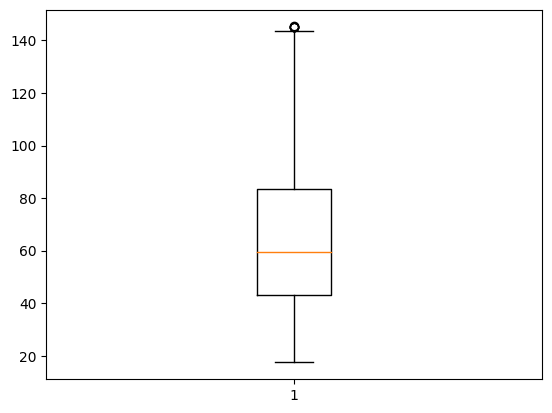

In [ ]:
box=plt.boxplot(data['Price'])
type(box)
for i,j in box.items():
  print(i,j)


In [ ]:
[item.get_ydata() for item in box['fliers']]

[array([145.29, 145.08, 145.18, 145.18, 145.18])]

Let us use Flooring and Capping method to treat Outliers

In [ ]:
Q1 = data['Price'].quantile(0.25)
Q3 = data['Price'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
data['Price']=np.where(data['Price']>upper_whisker,upper_whisker,np.where(data['Price']<lower_whisker,lower_whisker,data['Price']))

Now we can observe the Outliers are not present.

HEAT MAP

<Axes: xlabel='Month', ylabel='Year'>

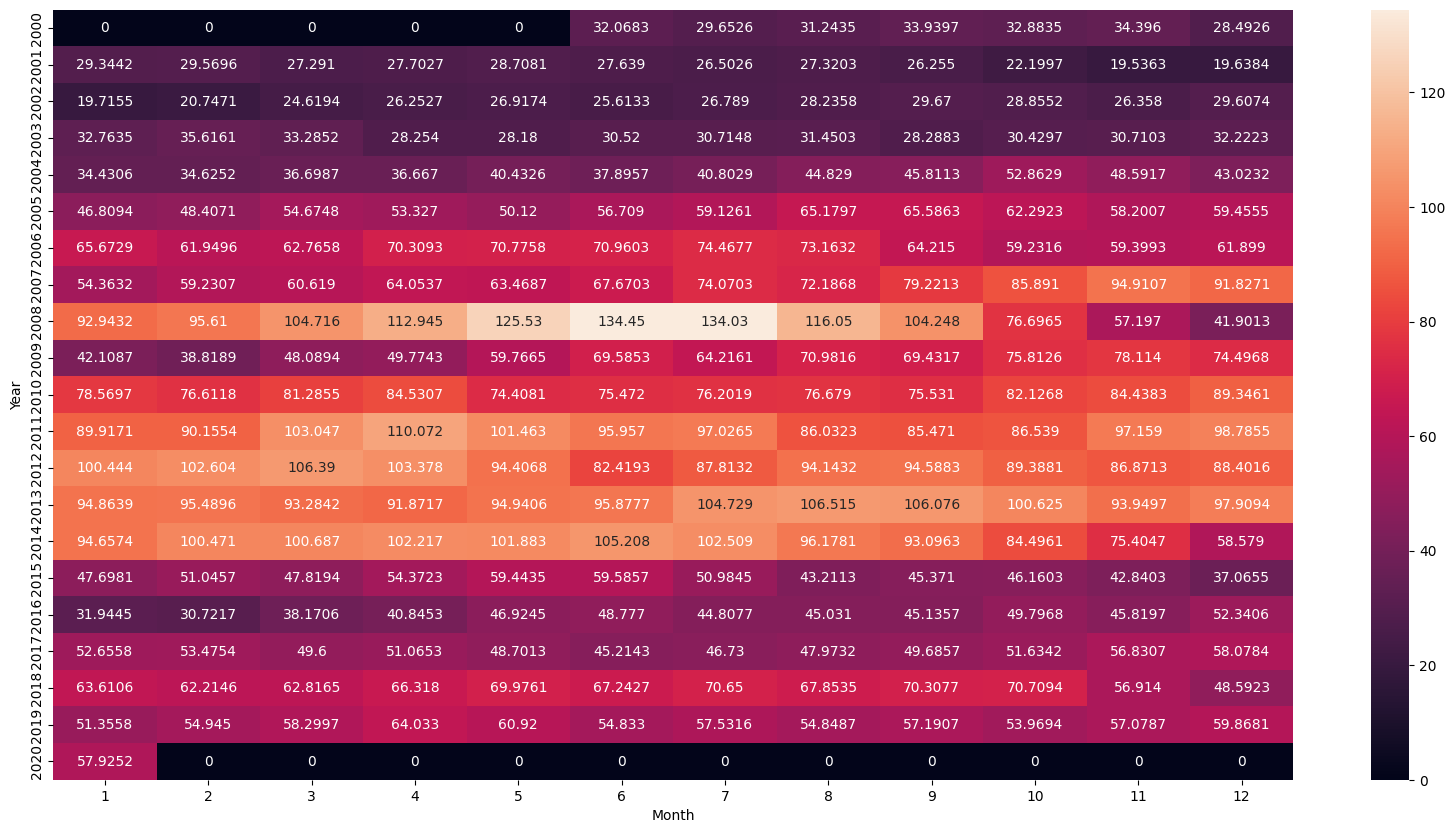

In [ ]:
#HeatMap
plt.figure(figsize=(20,10))
table=pd.pivot_table(data=data, values='Price',index='Year', columns='Month',fill_value=0)
sns.heatmap(table, annot=True,fmt="g")

Observations:

*  The light color represents high price
*  Dark coolor represents low price.

*   In our data we have only Jan data in 2020 hence remaining all is showing as 0
*   Similarly in year 2000 we have data from June hence those values are also 0

*  June, 2008 has high avg Oil price.
*  December, 2001 has low avg Oil price.

*   From 2000 to 2004 the Oil price is very low and from 2005 to 2014 the Oil price has increased. From 2014 to 2020 Oil price has reduced little









HISTOGRAM AND DENSITY PLOT

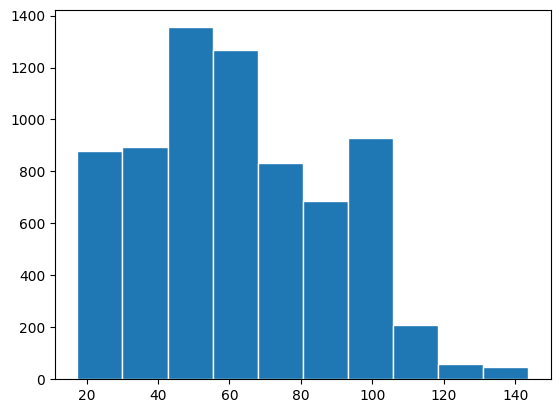

In [ ]:
#Histogram
plt.hist(data['Price'],edgecolor='w')
plt.show()

It is not Normal distribution, it is right skewed.

<Axes: ylabel='Density'>

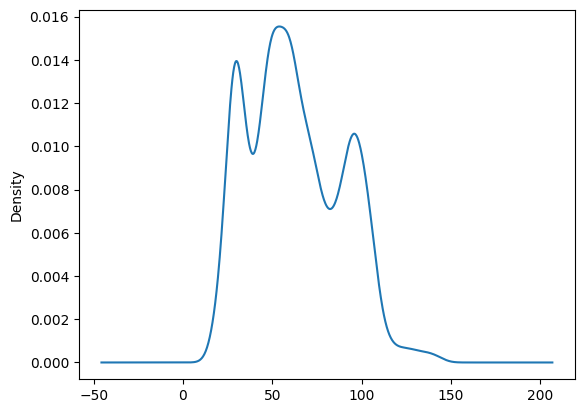

In [ ]:
#Density plot
data.Price.plot(kind="kde")

We can see three peaks in our density plot and right skewed

Squreroot Transformation

* As our data is not normally distributed, we will apply Squareroot Transformation.




<ipython-input-39-bbedac4b7bab>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Sqrt)


<Axes: xlabel='Sqrt', ylabel='Density'>

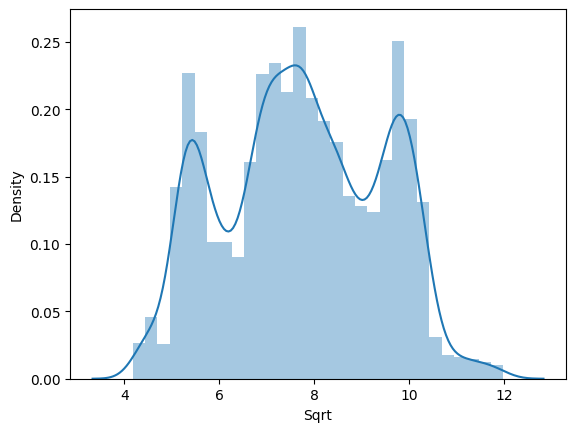

In [ ]:
data['Sqrt']=np.sqrt(data['Price'])
sns.distplot(data.Sqrt)

Observations:


*   We have transformed our data, we can observe the range of the price is in between 4 to 12
*   It is trimodal histogram. This means that there are three values that occur most frequently in the data set, and the histogram has three distinct peaks.







LAGPLOT









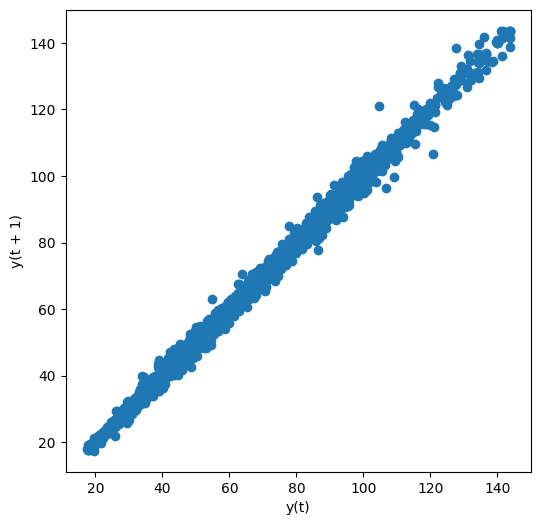

In [ ]:
#LAG PLOT
from pandas.plotting import lag_plot
plt.figure(figsize=(6,6))
lag_plot(data['Price'])
plt.show()

Obsrvation:


*   As y(t) increases y(t+1) is also increasing
*   Lag=1
*   Postivie correltion









AUTO-CORRELATION PLOT

*   Autocorrelation represents the degree of similarity between a given time series and a lagged version of itself over successive time intervals.




In [ ]:
#Auto-correlation plot
from statsmodels.graphics.tsaplots import plot_acf

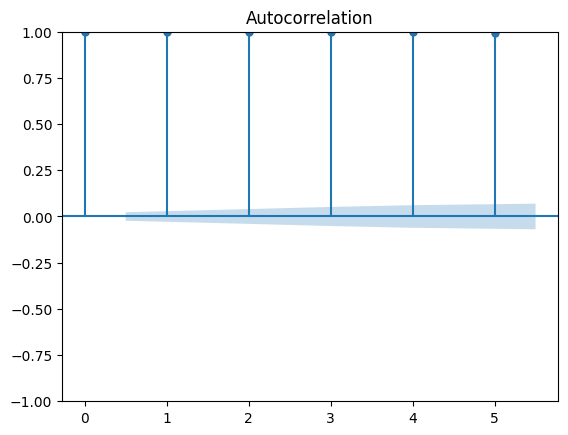

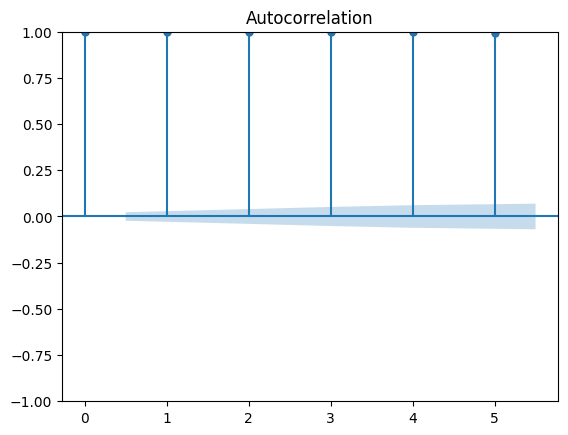

In [ ]:
plot_acf(data['Price'], lags=5)






*   Auto-correlation plot for 5 lags
*   We can find the seasonality and trend here, there is no seasonality nor trend
*   From the plot we can observe it has stronge postive correlation.






In [ ]:
data['log_Price']=np.log(data['Price'])

In [ ]:
t = np.arange(1,7161)
t

array([   1,    2,    3, ..., 7158, 7159, 7160])

In [ ]:
data['t']=t

In [ ]:
t_squared=np.array(t*t)
t_squared

array([       1,        4,        9, ..., 51236964, 51251281, 51265600])

In [ ]:
data['t_squared']=t_squared

In [ ]:
data.head()

,Price,Year,Month,Sqrt,log_Price,t,t_squared
date,,,,,,,
2000-06-25,31.60,2000,6,5.621388,3.453157,1,1
2000-06-26,31.63,2000,6,5.624055,3.454106,2,4
2000-06-27,32.06,2000,6,5.662155,3.467609,3,9
2000-06-28,31.90,2000,6,5.648008,3.462606,4,16
2000-06-29,32.72,2000,6,5.720140,3.487987,5,25


#Train and Test split

In [ ]:
Train=data.head(5000)
Test=data.tail(2160)

In [ ]:
Test.head()

,Price,Year,Month,Sqrt,log_Price,t,t_squared
date,,,,,,,
2014-03-04,103.33,2014,3,10.165136,4.637928,5001,25010001
2014-03-05,101.45,2014,3,10.072239,4.619566,5002,25020004
2014-03-06,101.56,2014,3,10.077698,4.620650,5003,25030009
2014-03-07,102.58,2014,3,10.128179,4.630643,5004,25040016
2014-03-08,101.12,2014,3,10.055844,4.616308,5005,25050025


In [ ]:
Train.head()

,Price,Year,Month,Sqrt,log_Price,t,t_squared
date,,,,,,,
2000-06-25,31.60,2000,6,5.621388,3.453157,1,1
2000-06-26,31.63,2000,6,5.624055,3.454106,2,4
2000-06-27,32.06,2000,6,5.662155,3.467609,3,9
2000-06-28,31.90,2000,6,5.648008,3.462606,4,16
2000-06-29,32.72,2000,6,5.720140,3.487987,5,25


#MODEL BUILDING

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
#LINEAR MODEL

Linear_model=smf.ols('Price~t', data=Train).fit( )    #y~x
pred_linear=pd.Series(Linear_model.predict(Test['t']))   #predicting for test
rmse_linear = np.sqrt(np.mean((np.array(Test['Price'])-np.array(pred_linear))**2))    #sqrt of mean(y act - y pred)^2
rmse_linear

71.09373590522983

In [ ]:
#EXPONENTIAL MODEL
#SAME LIKE LINEAR BUT IN PLACE OF Yt WE USE LOG(Yt)


Exp=smf.ols('log_Price~t', data=Train).fit( )                                   #log(y)~x
pred_Exp=pd.Series(Exp.predict(Test['t']))   #predicting for test
rmse_Exp = np.sqrt(np.mean((np.array(Test['Price'])-np.array(np.exp(pred_Exp)))**2))    #sqrt of mean(y act - y pred)^2
rmse_Exp

125.25195377337275

In [ ]:
#QUADRATIC   here we are creating two independent variables

Quad=smf.ols('Price~t+t_squared', data=Train).fit( )

pred_Quad=pd.Series(Quad.predict(Test[['t', 't_squared']]))    #predicting for test
rmse_Quad = np.sqrt(np.mean((np.array(Test['Price'])-np.array(pred_Quad))**2))    #sqrt of mean(y act - y pred)^2
rmse_Quad

53.03218178069081

A. Exponential Smoothning

*   Simple Exponential Smoothing
*   Double Exponential Smoothing
*   Triple Exponential Smoothing








Simple Exponential Smoothing

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
alpha = 0.15

In [ ]:
model_ses12=SimpleExpSmoothing(data['Price'])
fitted_model= model_ses12.fit(smoothing_level=alpha,optimized=False)
fitted_model.fittedvalues

date
2000-06-25    31.600000
2000-06-26    31.600000
2000-06-27    31.604500
2000-06-28    31.672825
2000-06-29    31.706901
                ...    
2020-01-27    56.365083
2020-01-28    55.881320
2020-01-29    55.521122
2020-01-30    55.192454
2020-01-31    54.734586
Freq: D, Length: 7160, dtype: float64

In [ ]:
data['SES12'] = fitted_model.fittedvalues.shift(-1)
data.head()

,Price,Year,Month,Sqrt,log_Price,t,t_squared,SES12
date,,,,,,,,
2000-06-25,31.60,2000,6,5.621388,3.453157,1,1,31.600000
2000-06-26,31.63,2000,6,5.624055,3.454106,2,4,31.604500
2000-06-27,32.06,2000,6,5.662155,3.467609,3,9,31.672825
2000-06-28,31.90,2000,6,5.648008,3.462606,4,16,31.706901
2000-06-29,32.72,2000,6,5.720140,3.487987,5,25,31.858866


Double Exponential Smoothing|

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

mod_add12 = ExponentialSmoothing(data['Price'], trend='add')
fitted_model= mod_add12.fit()
data['DESadd12'] = fitted_model.fittedvalues.shift(-1)
data.head()

,Price,Year,Month,Sqrt,log_Price,t,t_squared,SES12,DESadd12
date,,,,,,,,,
2000-06-25,31.60,2000,6,5.621388,3.453157,1,1,31.600000,31.602793
2000-06-26,31.63,2000,6,5.624055,3.454106,2,4,31.604500,31.632435
2000-06-27,32.06,2000,6,5.662155,3.467609,3,9,31.672825,32.057251
2000-06-28,31.90,2000,6,5.648008,3.462606,4,16,31.706901,31.904824
2000-06-29,32.72,2000,6,5.720140,3.487987,5,25,31.858866,32.712232


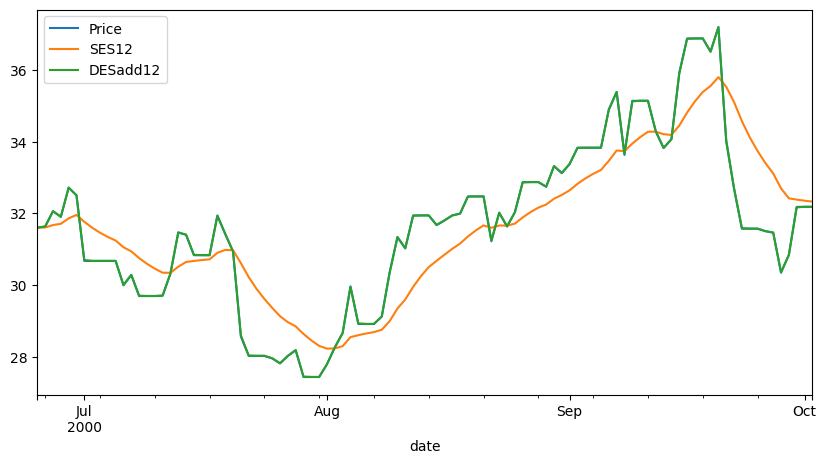

In [ ]:
data[['Price','SES12','DESadd12']].iloc[:100].plot(figsize=(10,5));

In [ ]:
data['DESmul12'] = ExponentialSmoothing(data['Price'], trend='mul').fit().fittedvalues.shift(-1)
data.head()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


,Price,Year,Month,Sqrt,log_Price,t,t_squared,SES12,DESadd12,DESmul12
date,,,,,,,,,,
2000-06-25,31.60,2000,6,5.621388,3.453157,1,1,31.600000,31.602793,31.596201
2000-06-26,31.63,2000,6,5.624055,3.454106,2,4,31.604500,31.632435,31.625757
2000-06-27,32.06,2000,6,5.662155,3.467609,3,9,31.672825,32.057251,32.050549
2000-06-28,31.90,2000,6,5.648008,3.462606,4,16,31.706901,31.904824,31.898099
2000-06-29,32.72,2000,6,5.720140,3.487987,5,25,31.858866,32.712232,32.705478


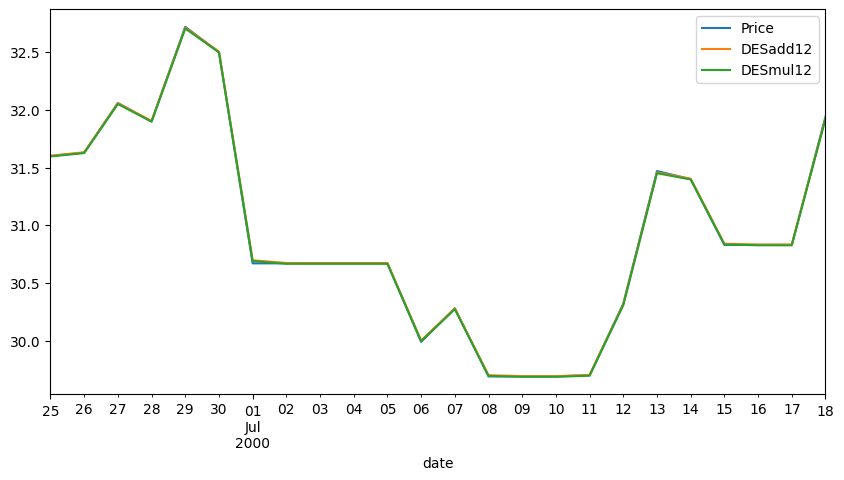

In [ ]:
data[['Price','DESadd12','DESmul12']].iloc[:24].plot(figsize=(10,5));

Triple Exponential Smoothing

In [ ]:
data['TESadd12'] = ExponentialSmoothing(data['Price'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
data.head()

,Price,Year,Month,Sqrt,log_Price,t,t_squared,SES12,DESadd12,DESmul12,TESadd12
date,,,,,,,,,,,
2000-06-25,31.60,2000,6,5.621388,3.453157,1,1,31.600000,31.602793,31.596201,31.589662
2000-06-26,31.63,2000,6,5.624055,3.454106,2,4,31.604500,31.632435,31.625757,31.604075
2000-06-27,32.06,2000,6,5.662155,3.467609,3,9,31.672825,32.057251,32.050549,31.621781
2000-06-28,31.90,2000,6,5.648008,3.462606,4,16,31.706901,31.904824,31.898099,32.022869
2000-06-29,32.72,2000,6,5.720140,3.487987,5,25,31.858866,32.712232,32.705478,31.877496


In [ ]:
data['TESmul12'] = ExponentialSmoothing(data['Price'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
data.head()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


,Price,Year,Month,Sqrt,log_Price,t,t_squared,SES12,DESadd12,DESmul12,TESadd12,TESmul12
date,,,,,,,,,,,,
2000-06-25,31.60,2000,6,5.621388,3.453157,1,1,31.600000,31.602793,31.596201,31.589662,31.481227
2000-06-26,31.63,2000,6,5.624055,3.454106,2,4,31.604500,31.632435,31.625757,31.604075,31.602200
2000-06-27,32.06,2000,6,5.662155,3.467609,3,9,31.672825,32.057251,32.050549,31.621781,31.619789
2000-06-28,31.90,2000,6,5.648008,3.462606,4,16,31.706901,31.904824,31.898099,32.022869,32.032229
2000-06-29,32.72,2000,6,5.720140,3.487987,5,25,31.858866,32.712232,32.705478,31.877496,31.864939


<Axes: xlabel='date'>

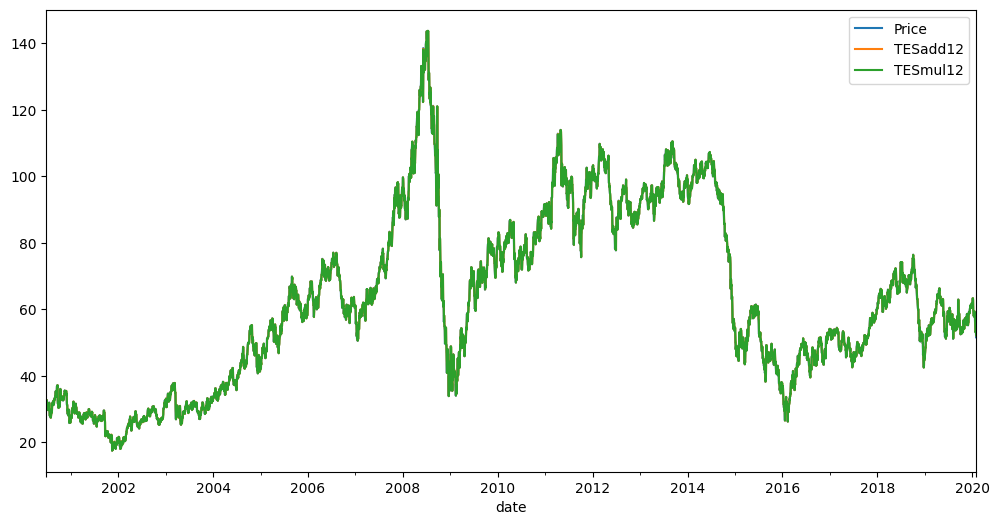

In [ ]:
data[['Price','TESadd12','TESmul12']].plot(figsize=(12,6))

<Axes: xlabel='date'>

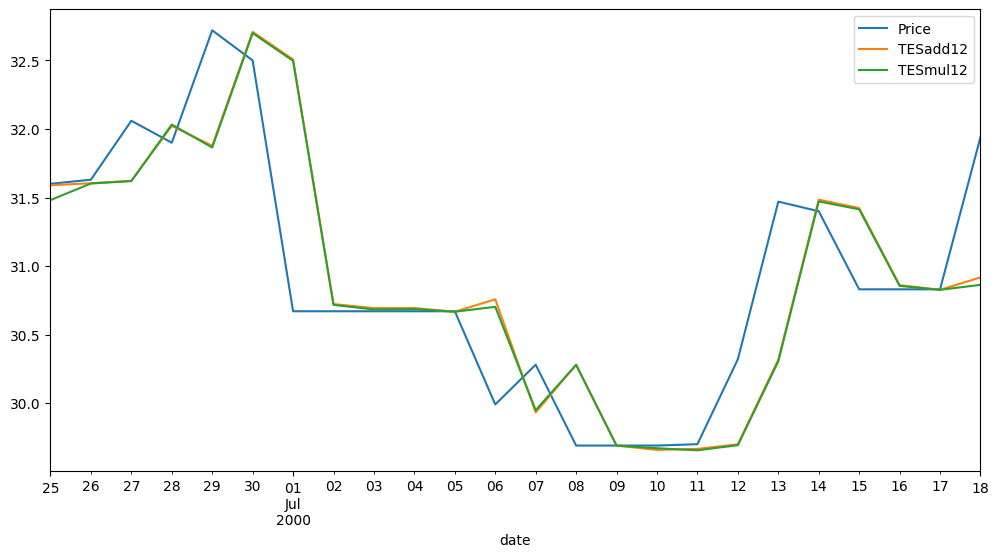

In [ ]:
data[['Price','TESadd12','TESmul12']].iloc[:24].plot(figsize=(12,6))

#Simple Average Model

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('default')
%matplotlib inline

In [ ]:
data['SMA30'] = data['Price'].rolling(30).mean()

In [ ]:
data.head()

,Price,Year,Month,Sqrt,log_Price,t,t_squared,SES12,DESadd12,DESmul12,TESadd12,TESmul12,SMA30
date,,,,,,,,,,,,,
2000-06-25,31.60,2000,6,5.621388,3.453157,1,1,31.600000,31.602793,31.596201,31.589662,31.481227,NaN
2000-06-26,31.63,2000,6,5.624055,3.454106,2,4,31.604500,31.632435,31.625757,31.604075,31.602200,NaN
2000-06-27,32.06,2000,6,5.662155,3.467609,3,9,31.672825,32.057251,32.050549,31.621781,31.619789,NaN
2000-06-28,31.90,2000,6,5.648008,3.462606,4,16,31.706901,31.904824,31.898099,32.022869,32.032229,NaN
2000-06-29,32.72,2000,6,5.720140,3.487987,5,25,31.858866,32.712232,32.705478,31.877496,31.864939,NaN


<Axes: xlabel='date'>

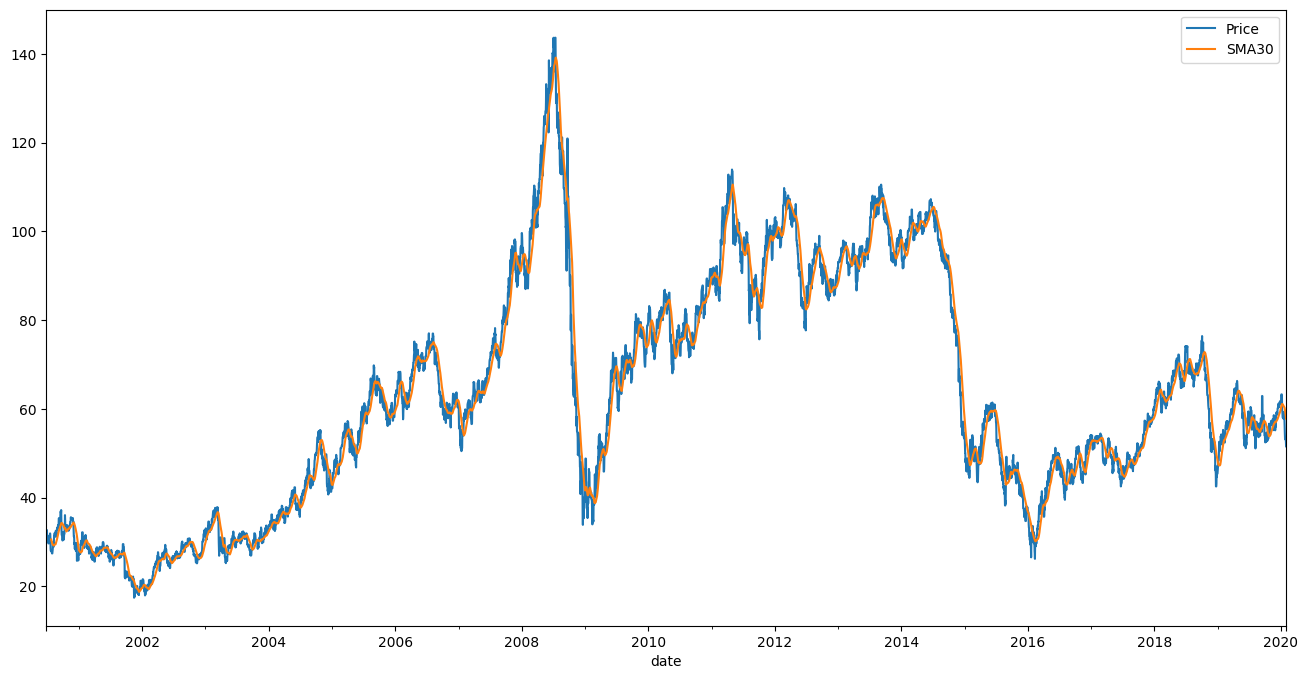

In [ ]:
data[['Price', 'SMA30']].plot(label='Oil Price',
                                  figsize=(16, 8))

#Cumulative Moving Average (CMA)

In [ ]:
data['CMA30'] = data['Price'].expanding().mean()

In [ ]:
data.head()

,Price,Year,Month,Sqrt,log_Price,t,t_squared,SES12,DESadd12,DESmul12,TESadd12,TESmul12,SMA30,CMA30
date,,,,,,,,,,,,,,
2000-06-25,31.60,2000,6,5.621388,3.453157,1,1,31.600000,31.602793,31.596201,31.589662,31.481227,NaN,31.600000
2000-06-26,31.63,2000,6,5.624055,3.454106,2,4,31.604500,31.632435,31.625757,31.604075,31.602200,NaN,31.615000
2000-06-27,32.06,2000,6,5.662155,3.467609,3,9,31.672825,32.057251,32.050549,31.621781,31.619789,NaN,31.763333
2000-06-28,31.90,2000,6,5.648008,3.462606,4,16,31.706901,31.904824,31.898099,32.022869,32.032229,NaN,31.797500
2000-06-29,32.72,2000,6,5.720140,3.487987,5,25,31.858866,32.712232,32.705478,31.877496,31.864939,NaN,31.982000


<Axes: xlabel='date'>

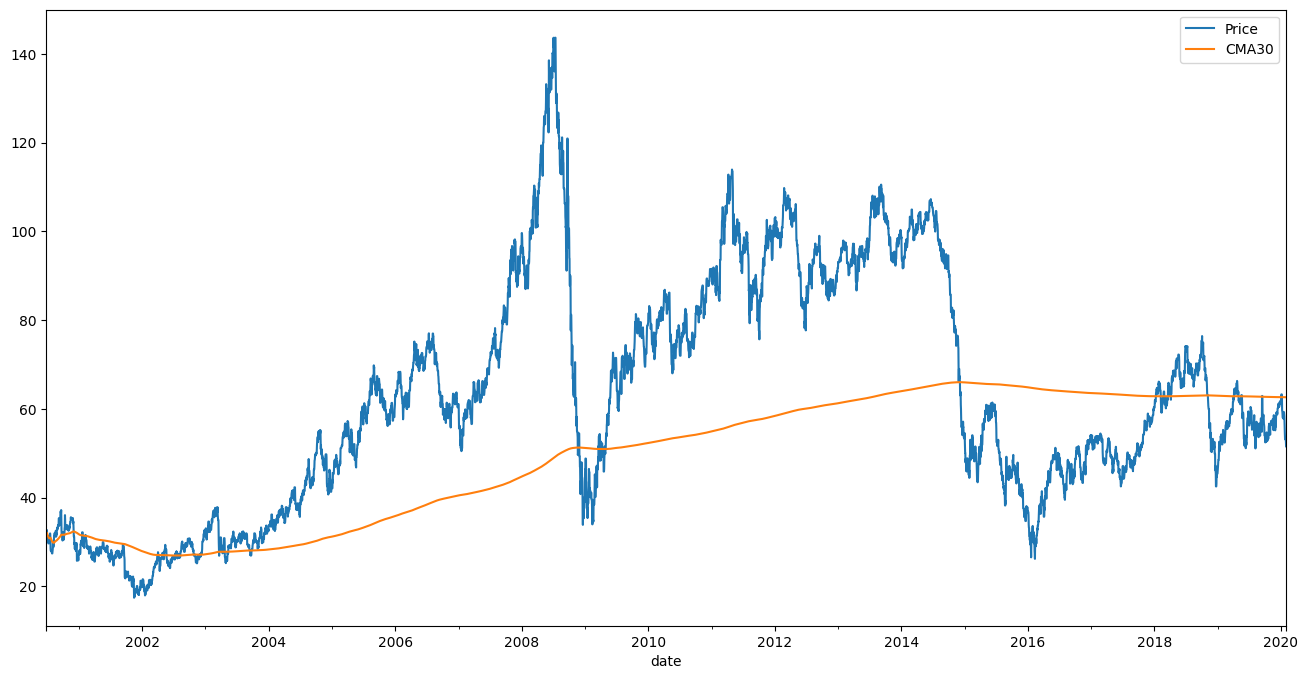

In [ ]:
data[['Price', 'CMA30']].plot(label='Oil Price',
                                  figsize=(16, 8))

In [ ]:
data.head(3)

,Price,Year,Month,Sqrt,log_Price,t,t_squared,SES12,DESadd12,DESmul12,TESadd12,TESmul12,SMA30,CMA30
date,,,,,,,,,,,,,,
2000-06-25,31.60,2000,6,5.621388,3.453157,1,1,31.600000,31.602793,31.596201,31.589662,31.481227,NaN,31.600000
2000-06-26,31.63,2000,6,5.624055,3.454106,2,4,31.604500,31.632435,31.625757,31.604075,31.602200,NaN,31.615000
2000-06-27,32.06,2000,6,5.662155,3.467609,3,9,31.672825,32.057251,32.050549,31.621781,31.619789,NaN,31.763333


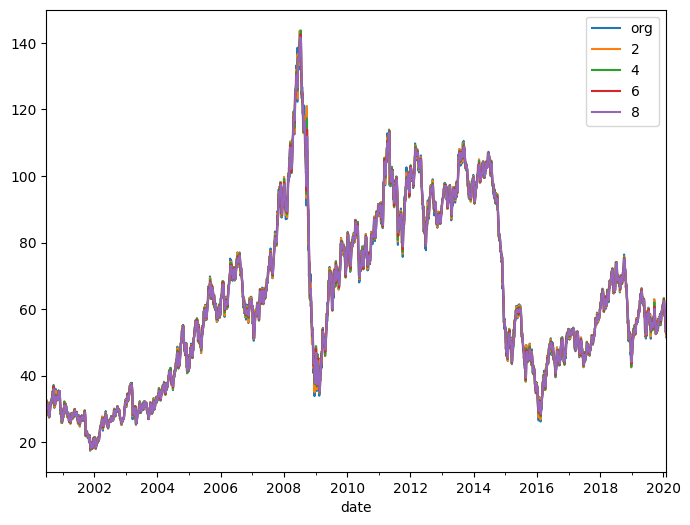

In [ ]:
plt.figure(figsize=(8,6))
data.Price.plot(label="org")
for i in range(2,10,2):
    data["Price"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

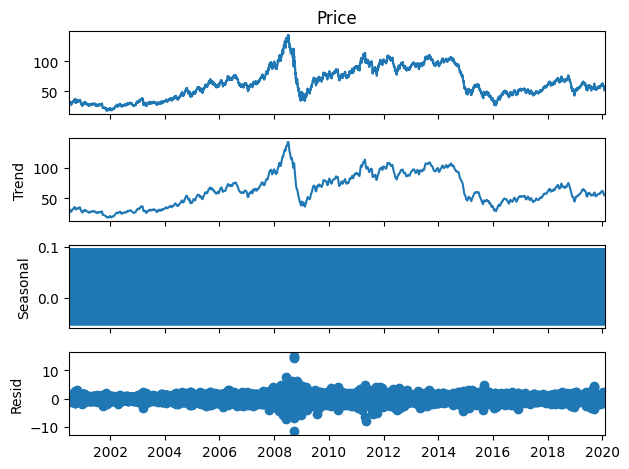

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(data.Price,period=12)
decompose_ts_add.plot()
plt.show()

#Quadratic

In [ ]:
Quad = smf.ols('Price~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Train[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Train['Price'])-np.array(pred_Quad))**2))
rmse_Quad

14.319458866885778

In [ ]:
import statsmodels.formula.api as smf
linear_model = smf.ols('Price~t', data=Train).fit()
pred_linear = pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Price'])-np.array(pred_linear))**2))
rmse_linear

71.09373590522983

ARIMA SARIMA MODEL

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from scipy.stats import randint

# Define parameter ranges for random search
param_dist = {
    'p': randint(0, 3),
    'd': randint(0, 2),
    'q': randint(0, 3)
}

# Number of random search iterations
n_iter = 10

# Split the data into train and test sets
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

best_mae = float('inf')
best_params = None

# Perform random search
for _ in range(n_iter):
    try:
        random_params = {param: dist.rvs() for param, dist in param_dist.items()}
        order = (random_params['p'], random_params['d'], random_params['q'])

        arima_model = ARIMA(train_data['Price'], order=order)
        arima_results = arima_model.fit()

        arima_forecast = arima_results.forecast(steps=len(test_data))
        arima_mae = mean_absolute_error(test_data['Price'], arima_forecast)

        if arima_mae < best_mae:
            best_mae = arima_mae
            best_params = order
    except:
        continue

print("Best ARIMA MAE:", best_mae)
print("Best ARIMA Parameters:", best_params)


Best ARIMA MAE: 7.0700777929858685
Best ARIMA Parameters: (2, 0, 2)


In [ ]:
 # You need to specify appropriate values for p, d, and q
order = best_params

In [ ]:
# Initialize and fit the ARIMA model
arima_model = ARIMA(Train['Price'], order=order)
arima_results = arima_model.fit()

In [ ]:
arima_forecast = arima_results.forecast(steps=len(Test))

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

arima_mae = mean_absolute_error(Test['Price'], arima_forecast)
arima_rmse = np.sqrt(mean_squared_error(Test['Price'], arima_forecast))

In [ ]:
print("ARIMA MAE:", arima_mae)
print("ARIMA RMSE:", arima_rmse)

ARIMA MAE: 21.31224701272919
ARIMA RMSE: 25.824742512917993


LSTM MODEL

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['Price']])

In [ ]:
sequence_length = 10

In [ ]:
sequences = []
target = []
for i in range(sequence_length, len(scaled_data)):
    sequences.append(scaled_data[i - sequence_length:i, 0])
    target.append(scaled_data[i, 0])

X = np.array(sequences)
y = np.array(target)

# Split the data into train and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [ ]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32)


Epoch 1/50
179/179 [==============================] - 4s 11ms/step - loss: 0.0239
Epoch 2/50
179/179 [==============================] - 1s 8ms/step - loss: 2.3253e-04
Epoch 3/50
179/179 [==============================] - 1s 7ms/step - loss: 2.1352e-04
Epoch 4/50
179/179 [==============================] - 1s 6ms/step - loss: 2.1102e-04
Epoch 5/50
179/179 [==============================] - 1s 7ms/step - loss: 2.0473e-04
Epoch 6/50
179/179 [==============================] - 1s 6ms/step - loss: 1.8847e-04
Epoch 7/50
179/179 [==============================] - 1s 6ms/step - loss: 1.7912e-04
Epoch 8/50
179/179 [==============================] - 1s 6ms/step - loss: 1.7841e-04
Epoch 9/50
179/179 [==============================] - 1s 6ms/step - loss: 1.7012e-04
Epoch 10/50
179/179 [==============================] - 1s 7ms/step - loss: 1.6611e-04
Epoch 11/50
179/179 [==============================] - 2s 10ms/step - loss: 1.6298e-04
Epoch 12/50
179/179 [==============================] - 2s 9ms/ste

In [ ]:
# Predictions
lstm_predictions = model.predict(X_test)
lstm_predictions = scaler.inverse_transform(lstm_predictions)
# Evaluate the LSTM model
lstm_mae = mean_absolute_error(Test['Price'][-len(lstm_predictions):], lstm_predictions)
lstm_rmse = np.sqrt(mean_squared_error(Test['Price'][-len(lstm_predictions):], lstm_predictions))
print("LSTM MAE:", lstm_mae)
print("LSTM RMSE:", lstm_rmse)

45/45 [==============================] - 0s 3ms/step
LSTM MAE: 0.6727107589828383
LSTM RMSE: 0.9601457608710728


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate Mean Absolute Percentage Error (MAPE)
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate R-squared (R2) score
def calculate_r2(y_true, y_pred):
    return r2_score(y_true, y_pred)
# Flatten the arrays for MAPE and R2 calculations
y_true_flat = test_data['Price'][-len(lstm_predictions):].values.flatten()
lstm_predictions_flat = lstm_predictions.flatten()

# Calculate MAPE and R2
mape = calculate_mape(y_true_flat, lstm_predictions_flat)
r2 = calculate_r2(y_true_flat, lstm_predictions_flat)

print("LSTM MAPE:", mape)
print("LSTM Accuracy:", r2)

import joblib
#joblib.dump(model, 'trained_lstm_model.pkl')
pkl_model_path = 'trained_lstm_model.pkl'
joblib.dump(model, pkl_model_path)
print(f"Model saved to {pkl_model_path} in .pkl format.")

# Save the model as a .h5 file
h5_model_path = 'trained_lstm_model.h5'
model.save(h5_model_path)
print(f"Model saved to {h5_model_path} in .h5 format.")

LSTM MAPE: 1.2588931481335097
LSTM Accuracy: 0.9871108766163865
Model saved to trained_lstm_model.pkl in .pkl format.
Model saved to trained_lstm_model.h5 in .h5 format.


 **Observation:
The prediction accuracy of the LSTM MODEL in terms of Mean Absolute Percentage Error (MAPE) in percentage.**

FB PROPHET MODEL

In [ ]:
!pip install prophet
from prophet import Prophet

In [ ]:
prophet_data = data.reset_index()
prophet_data.rename(columns={'date': 'ds', 'Price': 'y'}, inplace=True)
# Split data into train and test sets
train_size = int(len(prophet_data) * 0.8)
prophet_train = prophet_data.iloc[:train_size]
prophet_test = prophet_data.iloc[train_size:]


In [ ]:
model_prophet = Prophet()
model_prophet.fit(prophet_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgh91ivvh/iw4hovjw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgh91ivvh/huys4bkn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86841', 'data', 'file=/tmp/tmpgh91ivvh/iw4hovjw.json', 'init=/tmp/tmpgh91ivvh/huys4bkn.json', 'output', 'file=/tmp/tmpgh91ivvh/prophet_modelh0jejzls/prophet_model-20230816045449.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:54:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:54:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = model_prophet.make_future_dataframe(periods=len(prophet_test))
forecast = model_prophet.predict(future)
# Extract predicted values for the test period
prophet_predictions = forecast['yhat'][-len(prophet_test):].values

# Evaluate the Prophet model
prophet_mae = mean_absolute_error(prophet_test['y'], prophet_predictions)
prophet_rmse = np.sqrt(mean_squared_error(prophet_test['y'], prophet_predictions))
print("Prophet MAE:", prophet_mae)
print("Prophet RMSE:", prophet_rmse)

Prophet MAE: 54.91556828533929
Prophet RMSE: 62.576798044631836


TREND PROJECTION

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
data['Day'] = (data.index - data.index[0]).days  # Add a day count column

# Split data into train and test sets
trend_train = data.iloc[:train_size]
trend_test = data.iloc[train_size:]

In [ ]:
# Fit a linear regression model
regressor = LinearRegression()
regressor.fit(trend_train[['Day']], trend_train['Price'])

LinearRegression()

In [ ]:
trend_test['TrendProjection'] = regressor.predict(trend_test[['Day']])

trend_mae = mean_absolute_error(trend_test['Price'], trend_test['TrendProjection'])
trend_rmse = np.sqrt(mean_squared_error(trend_test['Price'], trend_test['TrendProjection']))
print("Trend Projection MAE:", trend_mae)
print("Trend Projection RMSE:", trend_rmse)

Trend Projection MAE: 49.959994706799634
Trend Projection RMSE: 50.43309258317095


<ipython-input-100-68d2fe6f83e7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trend_test['TrendProjection'] = regressor.predict(trend_test[['Day']])


GRU MODEL

In [ ]:
from tensorflow.keras.layers import GRU


In [ ]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['Price']])

sequence_length = 10
sequences = []
target = []
for i in range(sequence_length, len(scaled_data)):
    sequences.append(scaled_data[i - sequence_length:i, 0])
    target.append(scaled_data[i, 0])

X = np.array(sequences)
y = np.array(target)

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [ ]:
model_gru = Sequential()
model_gru.add(GRU(units=50, activation='relu', input_shape=(X_train.shape[1], 1)))
model_gru.add(Dense(units=1))
model_gru.compile(optimizer='adam', loss='mean_squared_error')
model_gru.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
179/179 [==============================] - 3s 6ms/step - loss: 0.0198
Epoch 2/50
179/179 [==============================] - 1s 6ms/step - loss: 1.8326e-04
Epoch 3/50
179/179 [==============================] - 1s 6ms/step - loss: 1.7233e-04
Epoch 4/50
179/179 [==============================] - 1s 7ms/step - loss: 1.7787e-04
Epoch 5/50
179/179 [==============================] - 2s 10ms/step - loss: 1.5938e-04
Epoch 6/50
179/179 [==============================] - 2s 9ms/step - loss: 1.5765e-04
Epoch 7/50
179/179 [==============================] - 1s 6ms/step - loss: 1.5027e-04
Epoch 8/50
179/179 [==============================] - 1s 6ms/step - loss: 1.4150e-04
Epoch 9/50
179/179 [==============================] - 1s 6ms/step - loss: 1.3812e-04
Epoch 10/50
179/179 [==============================] - 1s 6ms/step - loss: 1.3251e-04
Epoch 11/50
179/179 [==============================] - 1s 6ms/step - loss: 1.3641e-04
Epoch 12/50
179/179 [==============================] - 1s 6ms/step

In [ ]:
#predictions
gru_predictions = model_gru.predict(X_test)
gru_predictions = scaler.inverse_transform(gru_predictions)

gru_mae = mean_absolute_error(Test['Price'][-len(gru_predictions):], gru_predictions)
gru_rmse = np.sqrt(mean_squared_error(Test['Price'][-len(gru_predictions):], gru_predictions))

print("GRU MAE:", gru_mae)
print("GRU RMSE:", gru_rmse)

45/45 [==============================] - 0s 3ms/step
GRU MAE: 0.5756635833953643
GRU RMSE: 0.8991162376742493


In [ ]:
import joblib
#joblib.dump(model, 'trained_gru_model.pkl')
pkl_model_path = 'trained_gru_model.pkl'
joblib.dump(model, pkl_model_path)
print(f"Model saved to {pkl_model_path} in .pkl format.")

# Save the model as a .h5 file
h5_model_path = 'trained_gru_model.h5'
model.save(h5_model_path)
print(f"Model saved to {h5_model_path} in .h5 format.")

Model saved to trained_gru_model.pkl in .pkl format.
Model saved to trained_gru_model.h5 in .h5 format.


In [ ]:
# Calculate Naive Forecast
data['Naive_Forecast'] = data['Price'].shift(1)
# Calculate Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE)
from sklearn.metrics import mean_absolute_error, mean_squared_error
naive_mae = mean_absolute_error(data['Price'].iloc[1:], data['Naive_Forecast'].iloc[1:])
naive_rmse = np.sqrt(mean_squared_error(data['Price'].iloc[1:], data['Naive_Forecast'].iloc[1:]))

print("Naive Forecast MAE:", naive_mae)
print("Naive Forecast RMSE:", naive_rmse)



Naive Forecast MAE: 0.6847765050984774
Naive Forecast RMSE: 1.1720659265941487


In [ ]:
import numpy as np
from tensorflow.keras.models import load_model

# Load the LSTM model from HDF5
model = load_model('trained_lstm_model.h5')

# Example input sequence
input_sequence = np.random.rand(10, 1)  # Adjust the input data as needed

# Make predictions using the loaded model
predictions = model.predict(input_sequence)

print("Predictions:", predictions)

1/1 [==============================] - 0s 266ms/step
Predictions: [[0.15666902]
 [0.1260296 ]
 [0.10209258]
 [0.14617088]
 [0.14131266]
 [0.08622776]
 [0.15052158]
 [0.15144329]
 [0.12696266]
 [0.12547097]]


In [ ]:

# Create the Python script to load and use the model
import numpy as np
from tensorflow.keras.models import load_model
# Load the LSTM model from HDF5
model = load_model('lstm_model.h5')
# Example input sequence
input_sequence = np.random.rand(10, 1)  # Adjust the input data as needed
# Make predictions using the loaded model
predictions = model.predict(input_sequence)

print("Predictions:", predictions)


1/1 [==============================] - 1s 881ms/step
Predictions: [[0.09362327]
 [0.05328604]
 [0.1054776 ]
 [0.15045947]
 [0.02849833]
 [0.05525362]
 [0.13280888]
 [0.16885363]
 [0.12483282]
 [0.09839305]]


"\n# Write the Python script to a file\nwith open('use_model.py', 'w') as f:\n    f.write(python_script)\n"

In [ ]:
import subprocess

# Run the use_model.py script
subprocess.run(['python', 'use_model.py'])


CompletedProcess(args=['python', 'use_model.py'], returncode=0)

In [1]:
!bash install_dependencies.sh


bash: install_dependencies.sh: No such file or directory


In [ ]:
!python lstm.py


2023-08-16 06:11:58.076785: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-08-16 06:12:02.488 
  command:

    streamlit run lstm.py [ARGUMENTS]


In [ ]:
!streamlit run lstm.py




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://35.245.21.181:8501

  Stopping...
  Stopping...
